<a href="https://colab.research.google.com/github/amaccodes/Data-Portfolio/blob/main/Titanic_End_to_End_Project_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ***END-TO-END PROJECT utilizing the Titanic dataset from Kaggle, Python, SQL, and Tableau***

# **STEP 1: COMMUNICATE WITH TEAM.**

Step 1. Kick-off meeting with management
Imagine you work for a company that builds ships and wants to investigate the Titanic tragedy to improve their designs. They aim to ensure that in emergencies, all passengers, regardless of class and age, have equal access to emergency exits and equipment. The team suspects that higher-class passengers on the Titanic had higher survival chances, and wants you to visualize the data to verify this suspicion.



M: Hey Aaron! How are you?

A: Hey! I am fine you?

...little chat

M: Titanic tragedy...

M: So we are trying to understand whether there was a problem with how cabins on Titanic were built. To understand that we would like to see if survival rate has anything to do with passenger class.

A: Am I understanding correctly, your goal is to see which passenger class had how many people survived? And you would like to see if there is any difference among the passenger classes in terms of survival rate?

M: Yes, you are correct.

A: Ok, would that be ok if we show a bar plot where you would have all the classes on the X-axis and the number of people who survived on the Y-axis? Also, we add another bar plot, where we show the survival rate in % for each of the passenger classes.

M: Yes, that would be great.

A: Would you like to have any filters on the data? For example, would you like to be able to filter data by age? This might help you understand if the difference between classes grows or shrinks for older people or children, who might be more vulnerable.

M: Yes, please. This makes sense.

Ohh, one more thing. Let us also have one more visual for different age categories, so I can clearly see the difference. Children, adults, and seniors. We would like to see that to have a broader picture on the survival rates, since age is certainly a factor.

A: Ok, how would we define these categories? Which age are children, which are adults, and which are seniors?

M: Please, you figure that out and suggest it during the next meeting.

A: Ok, let us quickly document the task.

# **STEP 2: DOCUMENT TASK DURING MEETING.**



# THE DOCUMENTATION:

##How to document a task during a meeting

###Meeting documentation template

**Goal**: See if survival rate had anything to do with passsenger class. Also to assess the most vulnerable age groups within the different passenger class categories.

**Visualisation**
(bar, pie, column etc.):

<figure>
  <left>
    <img src='https://drive.google.com/uc?export=view&id=15fIbp6qRXgfL6vHfpkPkIG4zCv15qxiD' width='400'/>
    <figcaption>Popular types of visuals</figcaption>
  </left>
</figure>

In [ ]:
# Here is where the documentation from the meeting in step 1 are:

# Chart 1
# Goal: show how many survived for each class
# Visualization (bar, pie, column, etc.): bar chart
# Numerical coloumn and aggregation (sum, percentage, etc.): Survived - sum
# Categorical column: Pclass
# Active filters: Age

# Chart 2
# Goal: show survival percentage of each class
# Visualization (bar, pie, column, etc.): bar chart
# Numerical coloumn and aggregation (sum, percentage, etc.): Survived - percentage
# Categorical column: Pclass
# Active filters: Age

# Chart 3
# Goal: show survival based on age and Pclass categories
# Visualization (bar, pie, column, etc.):
# Numerical coloumn and aggregation (sum, percentage, etc.):
# Survived - percentage
# Categorical column 1: Pclass
# Categorical column 2: Age (Child, Adults, Seniors)
# Active filters: None

# **STEP 3: GET DATA ENGINEER TO PREPARE THE DATA FOR YOU/ OBTAIN THE DATA.**


In [ ]:
import pandas as pd
import gdown
from sqlalchemy import create_engine

# File ID from the Google Drive link
file_id = '15cFsnPnHc7KlzV0C9QQ5wG5v8PWqJ65C'
download_url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
output_file = 'downloaded_file.csv'
gdown.download(download_url, output_file, quiet=False)

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(output_file)

# Create an SQLite database connection
database_filename = 'my_database.db'
engine = create_engine(f'sqlite:///{database_filename}')

# Save the DataFrame to SQL
df.to_sql('titanic_data', con=engine, if_exists='replace', index=False)

print("Data successfully inserted into SQLite database.")

Downloading...
From: https://drive.google.com/uc?id=15cFsnPnHc7KlzV0C9QQ5wG5v8PWqJ65C
To: /content/downloaded_file.csv
100%|██████████| 61.2k/61.2k [00:00<00:00, 26.7MB/s]

Data successfully inserted into SQLite database.


# **STEP 4: QUERY using SQL and WRANGLE the data with PANDAS LIBRARY in PYTHON.**

In [ ]:
# Define query the data to see if it works
query = """
SELECT Name, Survived, Pclass, Age FROM titanic_data;
"""
# Define dataframe based on SQL database
df = pd.read_sql_query(query, engine)

# Show first 10 rows of the dataframe
df.head(10)

,Name,Survived,Pclass,Age
0,"Braund, Mr. Owen Harris",0,3,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,38.0
2,"Heikkinen, Miss. Laina",1,3,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,35.0
4,"Allen, Mr. William Henry",0,3,35.0
5,"Moran, Mr. James",0,3,NaN
6,"McCarthy, Mr. Timothy J",0,1,54.0
7,"Palsson, Master. Gosta Leonard",0,3,2.0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,3,27.0
9,"Nasser, Mrs. Nicholas (Adele Achem)",1,2,14.0


Data description
<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

In [ ]:
# Figure out the different characters of the dataframe
df.describe()

,Survived,Pclass,Age
count,891.000000,891.000000,714.000000
mean,0.383838,2.308642,29.699118
std,0.486592,0.836071,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,2.000000,20.125000
50%,0.000000,3.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      891 non-null    object 
 1   Survived  891 non-null    int64  
 2   Pclass    891 non-null    int64  
 3   Age       714 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [ ]:
# Substitute the null values for the age column with the average age for a given passenger
df['Age'].fillna(df['Age'].mean().round(), inplace=True)

# Check how many null values there are for each column of the dataframe
df.isnull().sum()

<ipython-input-7-4a2fc4b7febe>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean().round(), inplace=True)


,0
Name,0
Survived,0
Pclass,0
Age,0


In [ ]:
# Round the Age column to nearest whole number in years
df['Age'] = df['Age'].round().astype(int)

In [ ]:
df.describe()

,Survived,Pclass,Age
count,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.754209
std,0.486592,0.836071,13.000828
min,0.000000,1.000000,0.000000
25%,0.000000,2.000000,22.000000
50%,0.000000,3.000000,30.000000
75%,1.000000,3.000000,35.000000
max,1.000000,3.000000,80.000000


In [ ]:
# Check if the age column now has zero null values and in integer form
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      891 non-null    object
 1   Survived  891 non-null    int64 
 2   Pclass    891 non-null    int64 
 3   Age       891 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 28.0+ KB


In [ ]:
# Print the dimensions of the dataframe to see how big the dataset is
print(f'(rows, columns): {(df.shape)}')

(rows, columns): (891, 4)


In [ ]:
# Define a function to categorize age in new age_category
def categorize_age(age):
    if age < 18:
      return 'Child'
    elif age <=65:
      return 'Adult'
    else:
      return 'Senior'

# Call the function to create new column with each row being assigned its respective category (Child, Adult, Senior)
df['Age_Category'] = df['Age'].apply(categorize_age)

# Check the info of the dataframe after the update
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          891 non-null    object
 1   Survived      891 non-null    int64 
 2   Pclass        891 non-null    int64 
 3   Age           891 non-null    int64 
 4   Age_Category  891 non-null    object
dtypes: int64(3), object(2)
memory usage: 34.9+ KB


In [ ]:
# View the different quantities of passengers between the age categories within the 'Age_Category' column
df['Age_Category'].value_counts()

,count
Age_Category,
Adult,770
Child,113
Senior,8


In [ ]:
# Export the data into a microsoft excel spreadsheet file
df.to_excel('titanic_data.xlsx', index=False)

print('\nData successfully exported to Excel file.')


Data successfully exported to Excel file.


In [ ]:
df.tail()

,Name,Survived,Pclass,Age,Age_Category
886,"Montvila, Rev. Juozas",0,2,27,Adult
887,"Graham, Miss. Margaret Edith",1,1,19,Adult
888,"Johnston, Miss. Catherine Helen ""Carrie""",0,3,30,Adult
889,"Behr, Mr. Karl Howell",1,1,26,Adult
890,"Dooley, Mr. Patrick",0,3,32,Adult


# **STEP 5: CREATE TABLEAU DASHBOARD.**

In [ ]:
# Embed the tableau dashboard utilizing its exclusive embed code from tableau public
from IPython.display import HTML

HTML("""
<div class='tableauPlaceholder' id='viz1737272924260' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;64&#47;645KWBPKC&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;645KWBPKC' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;64&#47;645KWBPKC&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1737272924260');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1024px';vizElement.style.height='795px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1024px';vizElement.style.height='795px';} else { vizElement.style.width='100%';vizElement.style.height='1277px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>
""")


#**STEP 6: Machine Learning model with Random Forest Classification.**





In [ ]:
# import the scikitlearn library for the data splitting function
from sklearn.model_selection import train_test_split

# Query the original database to extract the Sex column
query = 'SELECT * FROM titanic_data'
# Transform the SQL query into a dataframe
df = pd.read_sql_query(query, engine)

# Fill all null values in 'Age' column with the average value for the column then round it
df['Age'].fillna(df['Age'].mean().round(), inplace=True)
# Round every value in the 'Age' column and turn the data type into an int
df['Age'] = df['Age'].round().astype(int)

# Save the structure of the updated dataframe regarding titanic_data into its dedicated excel file
df.to_excel('/content/titanic_data.xlsx')

# Define the original data that we need to split into two different subsets: (test, train)
df = pd.read_excel('/content/titanic_data.xlsx')

# Call the function and asssign the values to each distinct subset
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)


# Write the training and test data into respective excel files
train_data.to_excel('/content/train_data.xlsx', index=False)
test_data.to_excel('/content/test_data.xlsx', index=False)

# Turn the excel files into pandas dataframes so you can analyze it
train_data = pd.read_excel('/content/train_data.xlsx')
test_data = pd.read_excel('/content/test_data.xlsx')

# train_data.info()
# train_data.describe()

test_data.info()
test_data.describe()




<ipython-input-57-4646e800738a>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean().round(), inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   179 non-null    int64  
 1   PassengerId  179 non-null    int64  
 2   Survived     179 non-null    int64  
 3   Pclass       179 non-null    int64  
 4   Name         179 non-null    object 
 5   Sex          179 non-null    object 
 6   Age          179 non-null    int64  
 7   SibSp        179 non-null    int64  
 8   Parch        179 non-null    int64  
 9   Ticket       179 non-null    object 
 10  Fare         179 non-null    float64
 11  Cabin        45 non-null     object 
 12  Embarked     179 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 18.3+ KB


,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,436.111732,437.111732,0.413408,2.223464,30.396648,0.402235,0.391061,30.684473
std,260.349331,260.349331,0.493826,0.877501,13.044616,0.730703,0.863185,39.447725
min,5.000000,6.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,216.500000,217.500000,0.000000,1.000000,22.000000,0.000000,0.000000,7.895800
50%,422.000000,423.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.500000
75%,655.000000,656.000000,1.000000,3.000000,36.000000,1.000000,0.000000,32.410400
max,889.000000,890.000000,1.000000,3.000000,71.000000,4.000000,5.000000,262.375000


In [ ]:


# Selecting the Survived column, filtering the training dataset where Sex == 'female' And assigning it to the variable women
women = train_data.loc[train_data.Sex == 'female']["Survived"]
# Calculate the survival percentage of women
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7387755102040816


In [ ]:
# Selecting the Survived column, filtering the training dataset where Sex == 'male' And assigning it to the variable men
men = train_data.loc[train_data.Sex == 'male']["Survived"]
# Calculate the survival percentage of men
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18629550321199143


In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

# Feature engineering
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1


features = ["Pclass", "Sex", "SibSp", "Parch", "FamilySize"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_test = test_data['Survived']

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy: .4f}')

print('\nClassification Report:')
print('\n', classification_report(y_test,predictions))

print('\nConfusion Matrix:')
print('\n', confusion_matrix(y_test, predictions))


Accuracy:  0.7989

Classification Report:

               precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:

 [[91 14]
 [22 52]]


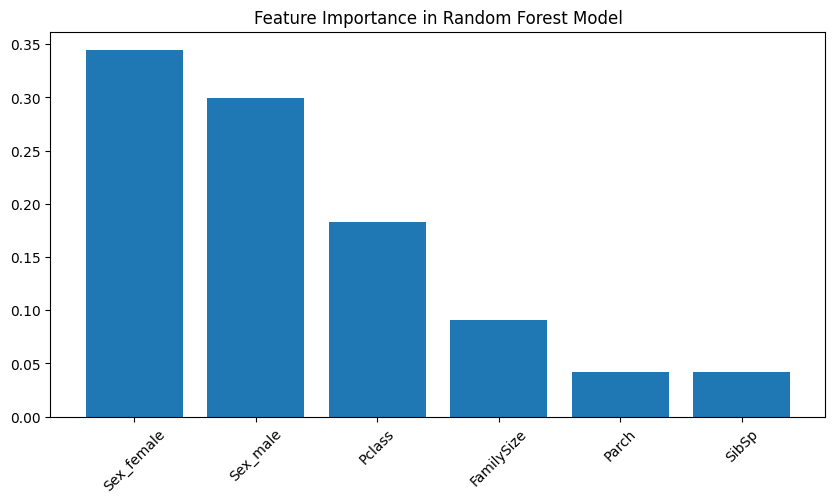

In [ ]:
# !!!!!!!!!!!!!!!!!!!! From CHATGPT !!!!!!!!!!!!!!!!!!!!!!!!!!

import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained model
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 5))
plt.title("Feature Importance in Random Forest Model")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.show()
